Esecuzione della simulazione 1/10
Convergenza raggiunta in 3 iterazioni.
Esecuzione della simulazione 2/10
Convergenza raggiunta in 2 iterazioni.
Esecuzione della simulazione 3/10
Convergenza raggiunta in 2 iterazioni.
Esecuzione della simulazione 4/10
Convergenza raggiunta in 2 iterazioni.
Esecuzione della simulazione 5/10
Convergenza raggiunta in 3 iterazioni.
Esecuzione della simulazione 6/10
Convergenza raggiunta in 2 iterazioni.
Esecuzione della simulazione 7/10
Convergenza raggiunta in 3 iterazioni.
Esecuzione della simulazione 8/10
Convergenza raggiunta in 3 iterazioni.
Esecuzione della simulazione 9/10
Convergenza raggiunta in 3 iterazioni.
Esecuzione della simulazione 10/10
Convergenza raggiunta in 3 iterazioni.
Miglior pay-off globale ottenuto: 3
Nodo 0 può migliorare il proprio pay-off cambiando strategia.


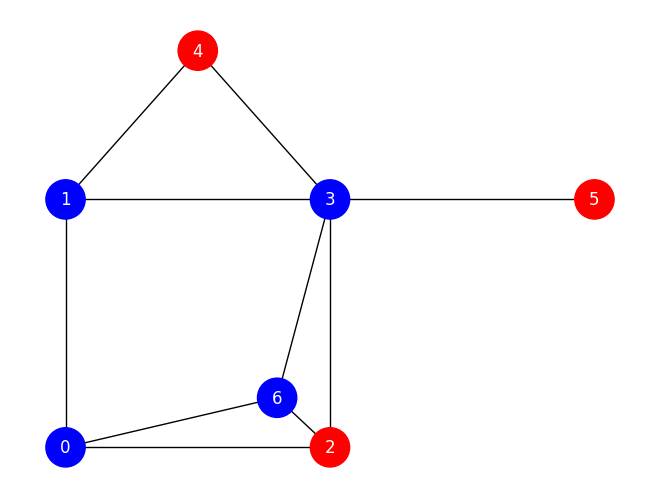

In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

# Nuove coordinate e raggio di interazione Rb
posizioni = [(0.0, 0.0), (0, 5), (5, 0), (5, 5), (2.5, 8), (10, 5), (4, 1)]
Rb = 5.3  # Raggio di interazione

# Creiamo un Unit Disk Graph (UDG) con le coordinate date e il raggio Rb
def genera_udg(posizioni, Rb):
    G = nx.Graph()
    for i, pos_i in enumerate(posizioni):
        for j, pos_j in enumerate(posizioni):
            if i != j and np.linalg.norm(np.array(pos_i) - np.array(pos_j)) <= Rb:
                G.add_edge(i, j)
    return G

# Funzione di pay-off aggiornata per il Maximum Independent Set
def payoff_locale_mis(grafo, strategia, nodo):
    vicini = list(grafo.neighbors(nodo))
    payoff = 0
    if strategia[nodo] == 1:
        # Se il nodo è eccitato (1), controlliamo i suoi vicini
        for vicino in vicini:
            if strategia[vicino] == 1:
                # Penalizzazione se un vicino è anch'esso eccitato
                return -1
        # Pay-off positivo se nessun vicino è eccitato
        payoff = 1
    return payoff

# Funzione di pay-off globale (somma di tutti i pay-off locali)
def calcola_payoff_globale_mis(grafo, strategia):
    payoff_totale = 0
    for nodo in grafo.nodes:
        payoff_totale += payoff_locale_mis(grafo, strategia, nodo)
    return payoff_totale

# Simulazione globale del gioco per massimizzare il pay-off totale del sistema
def simulazione_gioco_globale(grafo, max_iterazioni=100, soglia_convergenza=0.01):
    # Inizializziamo le strategie (0 o 1 casualmente)
    strategia = {nodo: random.choice([0, 1]) for nodo in grafo.nodes}
    payoff_precedente = calcola_payoff_globale_mis(grafo, strategia)
    
    for iterazione in range(max_iterazioni):
        miglioramento = 0
        strategia_precedente = strategia.copy()
        
        # Ogni nodo valuta se cambiare strategia, cercando di migliorare il pay-off globale
        for nodo in grafo.nodes:
            strategia_corrente = strategia[nodo]
            strategia_alternativa = 1 - strategia_corrente
            strategia[nodo] = strategia_alternativa
            payoff_nuovo = calcola_payoff_globale_mis(grafo, strategia)
            
            # Ripristiniamo la strategia originale se il pay-off globale non migliora
            if payoff_nuovo <= payoff_precedente:
                strategia[nodo] = strategia_corrente
            else:
                miglioramento = payoff_nuovo - payoff_precedente
                payoff_precedente = payoff_nuovo  # Aggiorniamo il pay-off globale se migliora

        # Criterio di convergenza raffinato
        if miglioramento < soglia_convergenza:
            print(f"Convergenza raggiunta in {iterazione+1} iterazioni.")
            break
    
    return strategia, payoff_precedente

# Eseguiamo più simulazioni per trovare il miglior risultato
def esegui_simulazioni_multiple(grafo, num_simulazioni=10):
    miglior_strategia = None
    miglior_payoff = -float('inf')
    
    for i in range(num_simulazioni):
        print(f"Esecuzione della simulazione {i+1}/{num_simulazioni}")
        strategia, payoff = simulazione_gioco_globale(grafo)
        if payoff > miglior_payoff:
            miglior_payoff = payoff
            miglior_strategia = strategia
    
    print(f"Miglior pay-off globale ottenuto: {miglior_payoff}")
    return miglior_strategia

# Funzione di pay-off locale (anticoordinamento con i vicini immediati)
def payoff_locale(grafo, strategia, nodo):
    vicini = list(grafo.neighbors(nodo))
    payoff = sum(1 for vicino in vicini if strategia[vicino] != strategia[nodo])
    return payoff

# Funzione di verifica per il Nash Equilibrium
def verifica_nash_equilibrium(grafo, strategia):
    for nodo in grafo.nodes:
        payoff_corrente = payoff_locale(grafo, strategia, nodo)
        strategia_alternativa = 1 - strategia[nodo]  # Cambio di strategia (da 1 a 0 o viceversa)
        strategia_modificata = strategia.copy()
        strategia_modificata[nodo] = strategia_alternativa
        payoff_nuovo = payoff_locale(grafo, strategia_modificata, nodo)
        
        # Se il cambio di strategia migliora il pay-off, non è un Nash Equilibrium
        if payoff_nuovo > payoff_corrente:
            print(f"Nodo {nodo} può migliorare il proprio pay-off cambiando strategia.")
            return False  # Non è un Nash Equilibrium
    print("Questa configurazione è un Nash Equilibrium.")
    return True  # È un Nash Equilibrium

# Generiamo un Unit Disk Graph (UDG) con le coordinate e il raggio di interazione Rb
G_udg = genera_udg(posizioni, Rb)

# Eseguiamo più simulazioni e scegliamo la configurazione con il miglior pay-off globale
num_simulazioni = 10  # Numero di simulazioni da eseguire
miglior_strategia = esegui_simulazioni_multiple(G_udg, num_simulazioni)
# Verifica se la configurazione è un Nash Equilibrium
nash_equilibrium = verifica_nash_equilibrium(G_udg, miglior_strategia)

# Mostriamo il grafo e la strategia finale migliore
color_map = ['blue' if miglior_strategia[node] == 0 else 'red' for node in G_udg.nodes]
nx.draw(G_udg, pos={i: pos for i, pos in enumerate(posizioni)}, with_labels=True, node_color=color_map, node_size=800, font_color='white')
plt.show()


# E' un equilibrio di Nash?

In [2]:
# Strategia di esempio (basata sul Maximum Independent Set trovato)
strategia_mis = {0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 1, 6: 1}

# Generiamo il grafo UDG
G_udg = genera_udg(posizioni, Rb)

# Verifica se la configurazione è un Nash Equilibrium
nash_equilibrium = verifica_nash_equilibrium(G_udg, strategia_mis)

Questa configurazione è un Nash Equilibrium.


# E' un ottimo di Pareto?

Esecuzione della simulazione 1/10
Convergenza raggiunta in 3 iterazioni.
Esecuzione della simulazione 2/10
Convergenza raggiunta in 2 iterazioni.
Esecuzione della simulazione 3/10
Convergenza raggiunta in 2 iterazioni.
Esecuzione della simulazione 4/10
Convergenza raggiunta in 3 iterazioni.
Esecuzione della simulazione 5/10
Convergenza raggiunta in 3 iterazioni.
Esecuzione della simulazione 6/10
Convergenza raggiunta in 3 iterazioni.
Esecuzione della simulazione 7/10
Convergenza raggiunta in 3 iterazioni.
Esecuzione della simulazione 8/10
Convergenza raggiunta in 2 iterazioni.
Esecuzione della simulazione 9/10
Convergenza raggiunta in 3 iterazioni.
Esecuzione della simulazione 10/10
Convergenza raggiunta in 2 iterazioni.
Miglior pay-off globale ottenuto: 3
La configurazione trovata è un Nash Equilibrium.
La configurazione trovata è un Ottimo di Pareto.


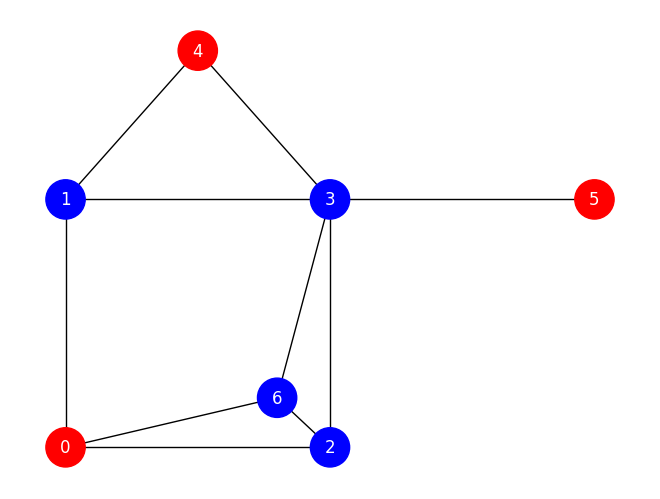

In [3]:


# Funzione di pay-off aggiornata per il Maximum Independent Set
def payoff_locale_mis(grafo, strategia, nodo):
    vicini = list(grafo.neighbors(nodo))
    payoff = 0
    if strategia[nodo] == 1:
        # Se il nodo è eccitato (1), controlliamo i suoi vicini
        for vicino in vicini:
            if strategia[vicino] == 1:
                # Penalizzazione se un vicino è anch'esso eccitato
                return -1
        # Pay-off positivo se nessun vicino è eccitato
        payoff = 1
    return payoff

# Funzione di pay-off globale (somma di tutti i pay-off locali)
def calcola_payoff_globale_mis(grafo, strategia):
    payoff_totale = 0
    for nodo in grafo.nodes:
        payoff_totale += payoff_locale_mis(grafo, strategia, nodo)
    return payoff_totale

# Simulazione globale del gioco per massimizzare il pay-off totale del sistema
def simulazione_gioco_globale(grafo, max_iterazioni=100, soglia_convergenza=0.01):
    # Inizializziamo le strategie (0 o 1 casualmente)
    strategia = {nodo: random.choice([0, 1]) for nodo in grafo.nodes}
    payoff_precedente = calcola_payoff_globale_mis(grafo, strategia)
    
    for iterazione in range(max_iterazioni):
        miglioramento = 0
        strategia_precedente = strategia.copy()
        
        # Ogni nodo valuta se cambiare strategia, cercando di migliorare il pay-off globale
        for nodo in grafo.nodes:
            strategia_corrente = strategia[nodo]
            strategia_alternativa = 1 - strategia_corrente
            strategia[nodo] = strategia_alternativa
            payoff_nuovo = calcola_payoff_globale_mis(grafo, strategia)
            
            # Ripristiniamo la strategia originale se il pay-off globale non migliora
            if payoff_nuovo <= payoff_precedente:
                strategia[nodo] = strategia_corrente
            else:
                miglioramento = payoff_nuovo - payoff_precedente
                payoff_precedente = payoff_nuovo  # Aggiorniamo il pay-off globale se migliora

        # Criterio di convergenza raffinato
        if miglioramento < soglia_convergenza:
            print(f"Convergenza raggiunta in {iterazione+1} iterazioni.")
            break
    
    return strategia, payoff_precedente

# Eseguiamo più simulazioni per trovare il miglior risultato
def esegui_simulazioni_multiple(grafo, num_simulazioni=10):
    miglior_strategia = None
    miglior_payoff = -float('inf')
    
    for i in range(num_simulazioni):
        print(f"Esecuzione della simulazione {i+1}/{num_simulazioni}")
        strategia, payoff = simulazione_gioco_globale(grafo)
        if payoff > miglior_payoff:
            miglior_payoff = payoff
            miglior_strategia = strategia
    
    print(f"Miglior pay-off globale ottenuto: {miglior_payoff}")
    return miglior_strategia

# Funzione per verificare se la configurazione è un Nash Equilibrium
def verifica_nash_equilibrium(grafo, strategia):
    for nodo in grafo.nodes:
        strategia_corrente = strategia[nodo]
        strategia_alternativa = 1 - strategia_corrente
        
        # Calcola il pay-off con la strategia corrente
        payoff_corrente = payoff_locale_mis(grafo, strategia, nodo)
        
        # Prova a cambiare la strategia solo di questo nodo
        strategia[nodo] = strategia_alternativa
        payoff_alternativo = payoff_locale_mis(grafo, strategia, nodo)
        
        # Ripristina la strategia originale
        strategia[nodo] = strategia_corrente
        
        # Se il pay-off alternativo è migliore, non siamo in un Nash Equilibrium
        if payoff_alternativo > payoff_corrente:
            return False
    return True

# Funzione per verificare se la configurazione è un ottimo di Pareto
def verifica_ottimo_di_pareto(grafo, strategia):
    for nodo in grafo.nodes:
        strategia_corrente = strategia[nodo]
        strategia_alternativa = 1 - strategia_corrente
        
        # Calcola il pay-off corrente del nodo e dei suoi vicini
        payoff_corrente = payoff_locale_mis(grafo, strategia, nodo)
        payoff_vicini_correnti = {vicino: payoff_locale_mis(grafo, strategia, vicino) for vicino in grafo.neighbors(nodo)}
        
        # Prova a cambiare la strategia del nodo
        strategia[nodo] = strategia_alternativa
        payoff_alternativo = payoff_locale_mis(grafo, strategia, nodo)
        payoff_vicini_alternativi = {vicino: payoff_locale_mis(grafo, strategia, vicino) for vicino in grafo.neighbors(nodo)}
        
        # Ripristina la strategia originale
        strategia[nodo] = strategia_corrente
        
        # Se il nodo migliora senza peggiorare i vicini, non siamo in un ottimo di Pareto
        if payoff_alternativo > payoff_corrente:
            miglioramento_vicini = all(payoff_vicini_alternativi[vicino] >= payoff_vicini_correnti[vicino] for vicino in grafo.neighbors(nodo))
            if miglioramento_vicini:
                return False
    return True

# Generiamo un Unit Disk Graph (UDG) con le coordinate e il raggio di interazione Rb
G_udg = genera_udg(posizioni, Rb)

# Eseguiamo più simulazioni e scegliamo la configurazione con il miglior pay-off globale
num_simulazioni = 10  # Numero di simulazioni da eseguire
miglior_strategia = esegui_simulazioni_multiple(G_udg, num_simulazioni)

# Verifica se la strategia trovata è un Nash Equilibrium
is_nash = verifica_nash_equilibrium(G_udg, miglior_strategia)
if is_nash:
    print("La configurazione trovata è un Nash Equilibrium.")
else:
    print("La configurazione trovata NON è un Nash Equilibrium.")

# Verifica se la strategia trovata è un Ottimo di Pareto
is_pareto = verifica_ottimo_di_pareto(G_udg, miglior_strategia)
if is_pareto:
    print("La configurazione trovata è un Ottimo di Pareto.")
else:
    print("La configurazione trovata NON è un Ottimo di Pareto.")

# Mostriamo il grafo e la strategia finale migliore
color_map = ['blue' if miglior_strategia[node] == 0 else 'red' for node in G_udg.nodes]
nx.draw(G_udg, pos={i: pos for i, pos in enumerate(posizioni)}, with_labels=True, node_color=color_map, node_size=800, font_color='white')
plt.show()


# Codice per calcolare le probabilità ottimali

In [4]:
from scipy.optimize import minimize
# Funzione di payoff locale atteso per il Nash misto
def payoff_atteso_misto(grafo, p_strategie, nodo):
    vicini = list(grafo.neighbors(nodo))
    payoff = 0
    
    # Calcoliamo il payoff atteso per ogni nodo
    contributo_nodo = 1 - p_strategie[nodo]  # Probabilità di contribuire (essere 0)
    
    # Se il nodo contribuisce (p = 0), controlla i vicini
    for vicino in vicini:
        # La probabilità che il vicino sia free rider (1)
        p_free_rider_vicino = p_strategie[vicino]
        # Penalizzazione se il vicino è free rider
        payoff -= p_free_rider_vicino
    
    # Se il nodo è free rider (p = 1), ha un payoff atteso basato sui vicini contribuenti
    payoff += contributo_nodo  # Aggiungiamo il payoff positivo per essere contribuente
    
    return payoff

# Funzione obiettivo da minimizzare per trovare le probabilità ottimali
def obiettivo_probabilita(p_strategie, grafo, strategia):
    p_strategie = np.clip(p_strategie, 0, 1)  # Limitiamo le probabilità tra 0 e 1
    errore_totale = 0
    
    # Confrontiamo le strategie deterministiche con quelle probabilistiche
    for nodo in grafo.nodes:
        payoff_atteso = payoff_atteso_misto(grafo, p_strategie, nodo)
        
        # Il nodo deve essere free rider (1) o contribuente (0) secondo la strategia fornita
        if strategia[nodo] == 1:
            errore_totale += (1 - p_strategie[nodo])**2  # Vogliamo p_nodo vicino a 1
        else:
            errore_totale += p_strategie[nodo]**2  # Vogliamo p_nodo vicino a 0
    
    return errore_totale

# Funzione per ottimizzare le probabilità in base alla strategia data
def ottimizza_probabilita(grafo, strategia):
    # Inizializziamo le probabilità casualmente
    p_iniziali = np.random.uniform(0, 1, len(grafo.nodes))
    
    # Minimizziamo la funzione obiettivo
    risultato = minimize(obiettivo_probabilita, p_iniziali, args=(grafo, strategia), method='SLSQP', bounds=[(0, 1) for _ in grafo.nodes])
    
    # Restituiamo le probabilità ottimizzate
    return risultato.x

# Definiamo la strategia deterministica fornita
strategia = {0: 1, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 0}

# Generiamo il grafo UDG con le coordinate e il raggio di interazione Rb
G_udg = genera_udg(posizioni, Rb)

# Ottimizziamo le probabilità in base alla strategia fornita
probabilita_ottimali = ottimizza_probabilita(G_udg, strategia)

# Stampa delle probabilità ottimali per ogni nodo
for nodo, prob in enumerate(probabilita_ottimali):
    print(f"Probabilità che il nodo {nodo} sia free rider (1): {prob:.3f}")

Probabilità che il nodo 0 sia free rider (1): 1.000
Probabilità che il nodo 1 sia free rider (1): 0.000
Probabilità che il nodo 2 sia free rider (1): 0.000
Probabilità che il nodo 3 sia free rider (1): 0.000
Probabilità che il nodo 4 sia free rider (1): 1.000
Probabilità che il nodo 5 sia free rider (1): 1.000
Probabilità che il nodo 6 sia free rider (1): 0.000
